<a href="https://colab.research.google.com/github/anushabhuchupalli/Aqua-Alert/blob/main/WATERCLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Define the path to the parent folder containing your dataset subfolders
parent_folder_path = '/content/drive/MyDrive/water'

# Define transformations including resizing and data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),  # Randomly rotate images up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color adjustments
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize pixel values
])

# Load the dataset
dataset = ImageFolder(root=parent_folder_path, transform=transform)

In [ ]:
from torch.utils.data import random_split

# Define the sizes for train, validation, and test sets
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Modify the output layer to match the number of classes (5 in your case)
num_classes = 6
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Define hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print training loss for the current epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

Epoch 1/10, Loss: 1.1872041374444962
Epoch 2/10, Loss: 0.7268209308385849
Epoch 3/10, Loss: 0.7490730260809263
Epoch 4/10, Loss: 0.45126549775401753
Epoch 5/10, Loss: 0.3345804028213024
Epoch 6/10, Loss: 0.27476727217435837
Epoch 7/10, Loss: 0.2737221382558346
Epoch 8/10, Loss: 0.2566353852550189
Epoch 9/10, Loss: 0.2197630355755488
Epoch 10/10, Loss: 0.2021439935391148


In [ ]:
model.eval()
correct_val, correct_test = 0, 0
total_val, total_test = 0, 0

# Validation set evaluation
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

# Test set evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate accuracy
val_accuracy = correct_val / total_val * 100
test_accuracy = correct_test / total_test * 100

print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Validation Accuracy: 70.89%
Test Accuracy: 77.50%


In [ ]:

torch.save(model.state_dict(), '/content/drive/MyDrive/my_model/my_model_weights.pth')

In [ ]:
pip install matplotlib


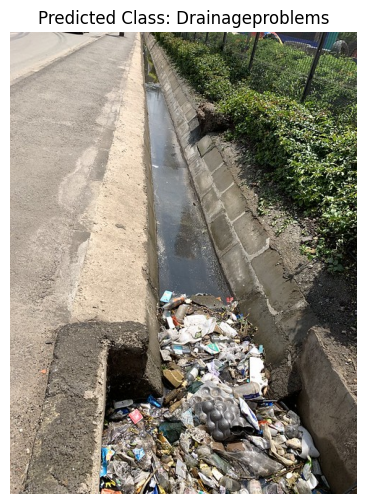

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import torchvision.models as models
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the path to your image file
image_path = '/content/drive/MyDrive/50022166951_15f359bf87_z.jpg'

# Define data transforms for the new image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the new image
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

# Load the trained model from Google Drive
# Define the model architecture to match the one you trained
model = models.resnet18(pretrained=False)  # Assuming you used a ResNet-18 model for training
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Define the output layer to match your problem

# Define the path to the model file saved on Google Drive
model_checkpoint_path = '/content/drive/MyDrive/my_model/my_model_weights.pth'

# Load the model checkpoint
model.load_state_dict(torch.load(model_checkpoint_path))

# Set the model to evaluation mode
model.eval()

# Make predictions on the new image
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs.data, 1)

# Map predicted class index to class label
class_labels = ['Drainageproblems', 'Floods', 'Potholes', 'Watercontamination', 'Waterleakage', 'nonwater']  # Replace with your class labels
predicted_label = class_labels[predicted.item()]

# Plot the original image with the predicted class label
original_image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis('off')
plt.show()


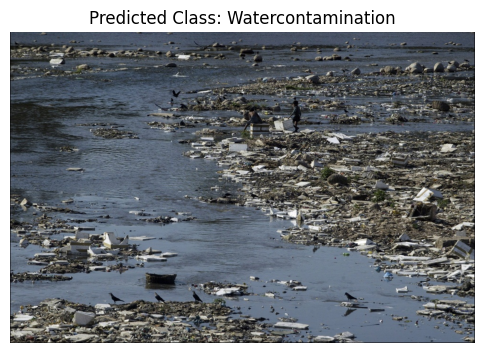

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import torchvision.models as models
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the path to your image file
image_path = '/content/drive/MyDrive/water-pollution.jpg'

# Define data transforms for the new image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the new image
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

# Load the trained model from Google Drive
# Define the model architecture to match the one you trained
model = models.resnet18(pretrained=False)  # Assuming you used a ResNet-18 model for training
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Define the output layer to match your problem

# Define the path to the model file saved on Google Drive
model_checkpoint_path = '/content/drive/MyDrive/my_model/my_model_weights.pth'

# Load the model checkpoint
model.load_state_dict(torch.load(model_checkpoint_path))

# Set the model to evaluation mode
model.eval()

# Make predictions on the new image
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs.data, 1)

# Map predicted class index to class label
class_labels = ['Drainageproblems', 'Floods', 'Potholes', 'Watercontamination', 'Waterleakage', 'nonwater']  # Replace with your class labels
predicted_label = class_labels[predicted.item()]

# Plot the original image with the predicted class label
original_image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis('off')
plt.show()

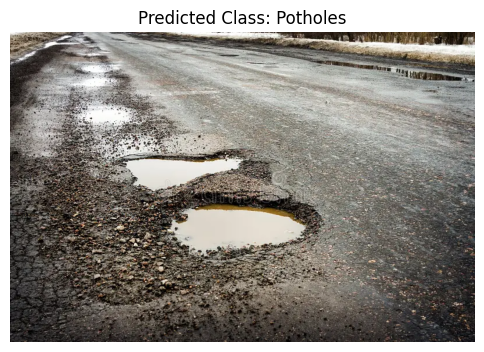

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import torchvision.models as models
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the path to your image file
image_path = '/content/drive/MyDrive/old-road-concept-highway-huge-pits-potholes-cloudy-weather-sky-thick-dark-clouds-symbol-hard-way-choice-old-road-114912933.webp'

# Define data transforms for the new image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the new image
image = Image.open(image_path)
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension

# Load the trained model from Google Drive
# Define the model architecture to match the one you trained
model = models.resnet18(pretrained=False)  # Assuming you used a ResNet-18 model for training
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Define the output layer to match your problem

# Define the path to the model file saved on Google Drive
model_checkpoint_path = '/content/drive/MyDrive/my_model/my_model_weights.pth'

# Load the model checkpoint
model.load_state_dict(torch.load(model_checkpoint_path))

# Set the model to evaluation mode
model.eval()

# Make predictions on the new image
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs.data, 1)

# Map predicted class index to class label
class_labels = ['Drainageproblems', 'Floods', 'Potholes', 'Watercontamination', 'Waterleakage', 'nonwater']  # Replace with your class labels
predicted_label = class_labels[predicted.item()]
# Plot the original image with the predicted class label
original_image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis('off')
plt.show()
